# Tutorial 6 - Recopilar datos desde Wikipedia

## 1. Wikipedia

https://github.com/goldsmith/Wikipedia

Una librería Python que encapsula [MediaWiki API](https://www.mediawiki.org/wiki/API:Main_page) para facilitar el acceso a los datos de Wikipedia: artículo, resumen, enlaces, imágenes, titulo, etc.

In [ ]:
#!pip install wikipedia

In [ ]:
import wikipedia

- Hacer una consulta (devuelve las páginas wikipedia que corresponden a la consulta):

In [ ]:
wikipedia.search("Trump")

- Ver el contenido de una página:

In [ ]:
page = wikipedia.page("Donald Trump")

In [ ]:
page.title

In [ ]:
page.url

In [ ]:
page.content

In [ ]:
page.links

In [ ]:
wikipedia.set_lang("es")

In [ ]:
page = wikipedia.page("Donald Trump")
page.content

In [ ]:
wikipedia.summary("Donald Trump", sentences=1)

In [ ]:
page.images

In [ ]:
import requests
import IPython.display as Disp
url = page.images[6]
Disp.Image(requests.get(url).content, width = 400) #height = 50

**Alternativas a la libreria 'wikipedia':**
    - https://pypi.org/project/Wikipedia-API/
    - https://en.wikipedia.org/wiki/Help:Creating_a_bot#Python

## 2. Wikipedia Page views

https://github.com/Commonists/pageview-api

Estadísticas sobre el número de visitas de los artículos wikipedia.

In [ ]:
#!pip install git+https://github.com/Commonists/pageview-api.git

In [15]:
import pageviewapi

- ¿Cómo ha evolucionado el número de vistas diarias de la página de Donald Trump entre dos fechas?

In [17]:
result1=pageviewapi.per_article('es.wikipedia', 'Donald Trump', '20201101', '20201110',
                        access='all-access', agent='all-agents', granularity='daily')
result1

AttrDict({'items': [{'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'daily', 'timestamp': '2020110100', 'access': 'all-access', 'agent': 'all-agents', 'views': 18565}, {'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'daily', 'timestamp': '2020110200', 'access': 'all-access', 'agent': 'all-agents', 'views': 29814}, {'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'daily', 'timestamp': '2020110300', 'access': 'all-access', 'agent': 'all-agents', 'views': 67268}, {'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'daily', 'timestamp': '2020110400', 'access': 'all-access', 'agent': 'all-agents', 'views': 184081}, {'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'daily', 'timestamp': '2020110500', 'access': 'all-access', 'agent': 'all-agents', 'views': 111733}, {'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'daily', 'timestamp': '2020110600', 'access': 'all-access'

In [18]:
import pandas as pd

df1 = pd.DataFrame()

for item in result1.items():
    for article in item[1]:
        timestamp=article['timestamp'][:8] #first 8 digits
        a_row = pd.Series([timestamp, article['views']])
        row_df = pd.DataFrame([a_row])
        df1 = pd.concat([df1, row_df], ignore_index=True)
        
df1.columns =['timestamp', 'views'] 
df1

,timestamp,views
0,20201101,18565
1,20201102,29814
2,20201103,67268
3,20201104,184081
4,20201105,111733
5,20201106,78586
6,20201107,138103
7,20201108,109680
8,20201109,55189
9,20201110,38116


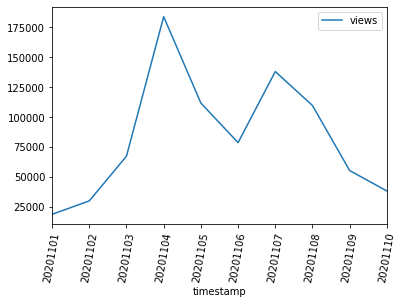

In [19]:
from matplotlib import pyplot

df1.plot(x='timestamp')
pyplot.xticks(rotation=80)
pyplot.show()

- ¿Cómo ha evolucionado el número de vistas mensuales de la página de Donald Trump entre dos fechas?

In [20]:
result2=pageviewapi.per_article('es.wikipedia', 'Donald Trump', '2018101', '20201030',
                        access='all-access', agent='all-agents', granularity='monthly')
result3=pageviewapi.per_article('es.wikipedia', 'Joe Biden', '2018101', '20201030',
                        access='all-access', agent='all-agents', granularity='monthly')

In [23]:
result2

AttrDict({'items': [{'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'monthly', 'timestamp': '2018100100', 'access': 'all-access', 'agent': 'all-agents', 'views': 99583}, {'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'monthly', 'timestamp': '2018110100', 'access': 'all-access', 'agent': 'all-agents', 'views': 221112}, {'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'monthly', 'timestamp': '2018120100', 'access': 'all-access', 'agent': 'all-agents', 'views': 157812}, {'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'monthly', 'timestamp': '2019010100', 'access': 'all-access', 'agent': 'all-agents', 'views': 140834}, {'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'monthly', 'timestamp': '2019020100', 'access': 'all-access', 'agent': 'all-agents', 'views': 137225}, {'project': 'es.wikipedia', 'article': 'Donald_Trump', 'granularity': 'monthly', 'timestamp': '2019030100', 'access'

In [21]:
import pandas as pd

df2 = pd.DataFrame()

for item in result2.items():
    for article in item[1]:
        timestamp=article['timestamp'][:8] #first 8 digits
        a_row = pd.Series([timestamp, article['views']])
        row_df = pd.DataFrame([a_row])
        df2 = pd.concat([df2, row_df], ignore_index=True)
        
df2.columns =['timestamp', 'views'] 

df3 = pd.DataFrame()

for item in result3.items():
    for article in item[1]:
        timestamp=article['timestamp'][:8] #first 8 digits
        a_row = pd.Series([timestamp, article['views']])
        row_df = pd.DataFrame([a_row])
        df3 = pd.concat([df3, row_df], ignore_index=True)
        
df3.columns =['timestamp', 'views'] 

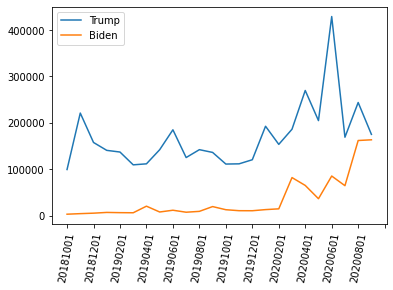

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.locator_params(nbins=10, axis='x')

for frame in [df2, df3]:
    plt.plot(frame['timestamp'], frame['views'])

plt.legend(['Trump','Biden']) 
pyplot.xticks(rotation=80)

max_xticks = 15
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)

pyplot.show()

- ¿Cuáles fueron las páginas más vistas el "4 noviembre 2020" en el wikipedia inglés?

In [ ]:
import pageviewapi
result=pageviewapi.top('en.wikipedia', 2020, 11, "04", access='all-access')
result

In [ ]:
for items in result.items():
    print(items[1])

In [ ]:
for article in items[1][0]['articles']:
    print(article)

In [ ]:
- ¿Qué busca la gente en el wikipedia español hoy?

In [ ]:
- ¿Qué busca la gente en el wikipedia español hoy

In [ ]:
import pageviewapi
result=pageviewapi.top('es.wikipedia', 2020, 11, "10", access='all-access')
result

In [ ]:
for items in result.items():
    for article in items[1][0]['articles']:
        print(article)

In [ ]:
df_top = pd.DataFrame()

for items in result.items():
    for article in items[1][0]['articles']:
        a_row = pd.Series([article['article'], article['views']])
        row_df = pd.DataFrame([a_row])
        df_top = pd.concat([df_top, row_df], ignore_index=True)

df_top.columns =['article', 'views'] 
df_top[2:12]

In [ ]:
df_top[2:22].plot.bar(x='article', y='views',rot=90)

## 3. Para experimentar...

- Supongamos que Wikipedia aproxima la **notoriedad pública** de ciertas personas: *¿Qué tan conocida es una persona por los ciudadanos?*)

- Supongamos que los medios de prensa, cuando citan a ciertas personas, les dan una **visibilidad mediática**: *¿Qué tan visible es una persona en los medios de prensa?*

Escribir un script que permite comparar la **notoriedad pública** y la **visibilidad mediática** de algunas personas.

In [1]:
import pandas as pd

DATASET_CSV="../datasets/CNNCHILE_RAW.csv"

df_CNN = pd.read_csv(DATASET_CSV,sep=',',error_bad_lines=False)
df_CNN = df_CNN.drop(['Unnamed: 0'], axis = 1) # Para suprimir la columna ID
df_CNN['date'] = pd.to_datetime(df_CNN['date']) # Para convertir la columna date en formato datetime

df_CNN

,country,media_outlet,url,title,body,date
0,chile,cnnchile,https://www.cnnchile.com/pais/caso-ambar-confi...,Caso Ámbar: Fiscalía confirma que cadáver fue ...,La Fiscalía confirmó este jueves el hallazgo d...,2020-08-06
1,chile,cnnchile,https://www.cnnchile.com/pais/parlamentarios-b...,Parlamentarios latinoamericanos piden a Bachel...,Un grupo de parlamentarios de distintas nacion...,2020-08-06
2,chile,cnnchile,https://www.cnnchile.com/pais/caso-ambar-detie...,Caso Ámbar: Detienen a la madre y su pareja po...,La Policía de Investigaciones (PDI) de Villa A...,2020-08-06
3,chile,cnnchile,https://www.cnnchile.com/pais/diputados-rn-pro...,Diputados RN presentan proyecto para regular r...,(Agencia Uno) – Luego de jurar y hacer oficial...,2020-08-06
4,chile,cnnchile,https://www.cnnchile.com/pais/diputado-mellado...,Mellado (RN) por crisis en La Araucanía: “¿Qui...,(Agencia Uno) – Cómo “insólito” calificó el di...,2020-08-06
5,chile,cnnchile,https://www.cnnchile.com/pais/providencia-plan...,Multas de hasta $50 millones: Providencia prep...,"(Agencia UNO) – La alcaldesa de Providencia, E...",2020-08-06
6,chile,cnnchile,https://www.cnnchile.com/pais/subsecretario-zu...,Subsecretario Zúñiga: “En lugar de ir a un mal...,"Durante la mañana de este jueves, el ministro ...",2020-08-06
7,chile,cnnchile,https://www.cnnchile.com/pais/formalizan-prime...,Formalizan el primer embargo a ex presidente E...,(Agencia UNO) – El ministro de fuero de la Cor...,2020-08-06
8,chile,cnnchile,https://www.cnnchile.com/pais/revocan-prision-...,Corte de Apelaciones revoca prisión preventiva...,"Este jueves, la Corte de Apelaciones de Santia...",2020-08-06
9,chile,cnnchile,https://www.cnnchile.com/pais/bellolio-impuest...,Bellolio por impuesto a los súper ricos: “Esta...,"El vocero de gobierno, Jaime Bellolio, abordó ...",2020-08-06


In [2]:
from pandasql import sqldf

q="""SELECT * FROM df_CNN WHERE date LIKE "2020-%";"""
CNN_2020=sqldf(q)
CNN_2020

,country,media_outlet,url,title,body,date
0,chile,cnnchile,https://www.cnnchile.com/pais/caso-ambar-confi...,Caso Ámbar: Fiscalía confirma que cadáver fue ...,La Fiscalía confirmó este jueves el hallazgo d...,2020-08-06 00:00:00.000000
1,chile,cnnchile,https://www.cnnchile.com/pais/parlamentarios-b...,Parlamentarios latinoamericanos piden a Bachel...,Un grupo de parlamentarios de distintas nacion...,2020-08-06 00:00:00.000000
2,chile,cnnchile,https://www.cnnchile.com/pais/caso-ambar-detie...,Caso Ámbar: Detienen a la madre y su pareja po...,La Policía de Investigaciones (PDI) de Villa A...,2020-08-06 00:00:00.000000
3,chile,cnnchile,https://www.cnnchile.com/pais/diputados-rn-pro...,Diputados RN presentan proyecto para regular r...,(Agencia Uno) – Luego de jurar y hacer oficial...,2020-08-06 00:00:00.000000
4,chile,cnnchile,https://www.cnnchile.com/pais/diputado-mellado...,Mellado (RN) por crisis en La Araucanía: “¿Qui...,(Agencia Uno) – Cómo “insólito” calificó el di...,2020-08-06 00:00:00.000000
5,chile,cnnchile,https://www.cnnchile.com/pais/providencia-plan...,Multas de hasta $50 millones: Providencia prep...,"(Agencia UNO) – La alcaldesa de Providencia, E...",2020-08-06 00:00:00.000000
6,chile,cnnchile,https://www.cnnchile.com/pais/subsecretario-zu...,Subsecretario Zúñiga: “En lugar de ir a un mal...,"Durante la mañana de este jueves, el ministro ...",2020-08-06 00:00:00.000000
7,chile,cnnchile,https://www.cnnchile.com/pais/formalizan-prime...,Formalizan el primer embargo a ex presidente E...,(Agencia UNO) – El ministro de fuero de la Cor...,2020-08-06 00:00:00.000000
8,chile,cnnchile,https://www.cnnchile.com/pais/revocan-prision-...,Corte de Apelaciones revoca prisión preventiva...,"Este jueves, la Corte de Apelaciones de Santia...",2020-08-06 00:00:00.000000
9,chile,cnnchile,https://www.cnnchile.com/pais/bellolio-impuest...,Bellolio por impuesto a los súper ricos: “Esta...,"El vocero de gobierno, Jaime Bellolio, abordó ...",2020-08-06 00:00:00.000000


In [3]:
import spacy

nlp = spacy.load('es_core_news_md')

In [4]:
entities={}

for index,row in CNN_2020.iterrows():
    if(index%100 == 0):
        print(index)
    # Text of the news
    text=row[4]
    
    # We apply NLP processing here, in particular Tokenization and Entity Name Recognition
    try:
        doc = nlp(text)
    except:
        continue
    
     # We analyze the entities from the document, and we use only the Person type(PER)
    for ent in doc.ents:
        
        # We check if entity is a Person type using the SpaCy model
        if(ent.label_=="PER"):
            #We tokenize the entity
            tokenized_entity=(ent.text).split(" ") 
            
            # We preserve only the entities that has between 2 abd 4 tokens (Usual name annotation in Chile)
            if ((len(tokenized_entity)>1) and len(tokenized_entity)<=4):
                
                entity_full_name = ent.text
                
                if entity_full_name in entities:
                    entities[entity_full_name] += 1

                else:
                    entities[entity_full_name] = 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400


In [5]:
sortedVisibility = sorted(entities.items(), key=lambda x: x[1], reverse=True)
sortedVisibility

[('Sebastián Piñera', 489),
 ('Donald Trump', 297),
 ('Colo Colo', 269),
 ('Jaime Mañalich', 172),
 ('Gonzalo Blumel', 141),
 ('George Floyd', 137),
 ('Ignacio Briones', 117),
 ('Joe Biden', 96),
 ('Arturo Vidal', 87),
 ('Michelle Bachelet', 78),
 ('Alexis Sánchez', 75),
 ('Enrique Paris', 73),
 ('Karla Rubilar', 72),
 ('Renovación Nacional', 70),
 ('Felipe Guevara', 69),
 ('Jair Bolsonaro', 69),
 ('Joaquín Lavín', 65),
 ('Izkia Siches', 65),
 ('Paula Daza', 60),
 ('Alberto Fernández', 60),
 ('Lucas Palacios', 59),
 ('Mario Desbordes', 56),
 ('Nicolás Maduro', 52),
 ('Claudio Bravo', 49),
 ('Andrés Allamand', 48),
 ('Daniel Jadue', 48),
 ('Bad Bunny', 46),
 ('Evelyn Matthei', 45),
 ('Evo Morales', 45),
 ('Marcela Cubillos', 44),
 ('Barack Obama', 43),
 ('Diego Schalper', 42),
 ('María José Zaldívar', 42),
 ('Manuel José Ossandón', 40),
 ('Juan Francisco Galli', 40),
 ('Gael Yeomans', 38),
 ('J Balvin', 38),
 ('Kamala Harris', 37),
 ('Felipe Ward', 36),
 ('Lionel Messi', 36),
 ('Antonia

In [6]:
sortedVisibility[0]

('Sebastián Piñera', 489)

In [13]:
len(sortedVisibility)

10118

In [29]:
sortedVisibility[0:50]

[('Sebastián Piñera', 489),
 ('Donald Trump', 297),
 ('Colo Colo', 269),
 ('Jaime Mañalich', 172),
 ('Gonzalo Blumel', 141),
 ('George Floyd', 137),
 ('Ignacio Briones', 117),
 ('Joe Biden', 96),
 ('Arturo Vidal', 87),
 ('Michelle Bachelet', 78),
 ('Alexis Sánchez', 75),
 ('Enrique Paris', 73),
 ('Karla Rubilar', 72),
 ('Renovación Nacional', 70),
 ('Felipe Guevara', 69),
 ('Jair Bolsonaro', 69),
 ('Joaquín Lavín', 65),
 ('Izkia Siches', 65),
 ('Paula Daza', 60),
 ('Alberto Fernández', 60),
 ('Lucas Palacios', 59),
 ('Mario Desbordes', 56),
 ('Nicolás Maduro', 52),
 ('Claudio Bravo', 49),
 ('Andrés Allamand', 48),
 ('Daniel Jadue', 48),
 ('Bad Bunny', 46),
 ('Evelyn Matthei', 45),
 ('Evo Morales', 45),
 ('Marcela Cubillos', 44),
 ('Barack Obama', 43),
 ('Diego Schalper', 42),
 ('María José Zaldívar', 42),
 ('Manuel José Ossandón', 40),
 ('Juan Francisco Galli', 40),
 ('Gael Yeomans', 38),
 ('J Balvin', 38),
 ('Kamala Harris', 37),
 ('Felipe Ward', 36),
 ('Lionel Messi', 36),
 ('Antonia

In [101]:
popularity={}

for entity in sortedVisibility[:50]:
    name=entity[0]
    
    try:
        visits_per_month=pageviewapi.per_article('es.wikipedia', name, '20200101', '20201030', 
                                             access='all-access', agent='all-agents', granularity='monthly')

        ## Sum
        sum=0
        for item in visits_per_month.items():
            for article in item[1]:
                view=article['views']
                sum=sum+view
    
        ## Save
        popularity[name] = sum
        
        print("Hay datos para: "+name+" - "+str(sum))
        
    except:
        popularity[name] = 1
        print("No hay datos para: "+name)
    
    

Hay datos para: Alberto Fernández - 613337
Hay datos para: Alexis Sánchez - 349692
Hay datos para: Andrés Allamand - 110851
No hay datos para: Antonia Barra
Hay datos para: Arturo Vidal - 372828
Hay datos para: Arturo Zúñiga - 103815
Hay datos para: Bad Bunny - 997342
Hay datos para: Barack Obama - 860136
Hay datos para: Catalina Pérez - 238
Hay datos para: Claudio Bravo - 2781
Hay datos para: Colo Colo - 27690
Hay datos para: Cristián Monckeberg - 47312
Hay datos para: Daniel Jadue - 110732
Hay datos para: Diego Schalper - 77118
Hay datos para: Donald Trump - 2024567
Hay datos para: Enrique Paris - 262908
Hay datos para: Evelyn Matthei - 83260
Hay datos para: Evo Morales - 231658
Hay datos para: Felipe Guevara - 248
Hay datos para: Felipe Ward - 20783
Hay datos para: Gael Yeomans - 13076
Hay datos para: Gary Medel - 91679
Hay datos para: George Floyd - 259614
Hay datos para: Giorgio Jackson - 43562
Hay datos para: Gonzalo Blumel - 99950
Hay datos para: Ignacio Briones - 112626
Hay dat

In [102]:
print(len(popularity))
popularity #qué paginas miran los ciudadanos hispanohablantes en wikipedia

50


{'Alberto Fernández': 613337,
 'Alexis Sánchez': 349692,
 'Andrés Allamand': 110851,
 'Antonia Barra': 1,
 'Arturo Vidal': 372828,
 'Arturo Zúñiga': 103815,
 'Bad Bunny': 997342,
 'Barack Obama': 860136,
 'Catalina Pérez': 238,
 'Claudio Bravo': 2781,
 'Colo Colo': 27690,
 'Cristián Monckeberg': 47312,
 'Daniel Jadue': 110732,
 'Diego Schalper': 77118,
 'Donald Trump': 2024567,
 'Enrique Paris': 262908,
 'Evelyn Matthei': 83260,
 'Evo Morales': 231658,
 'Felipe Guevara': 248,
 'Felipe Ward': 20783,
 'Gael Yeomans': 13076,
 'Gary Medel': 91679,
 'George Floyd': 259614,
 'Giorgio Jackson': 43562,
 'Gonzalo Blumel': 99950,
 'Ignacio Briones': 112626,
 'Izkia Siches': 168514,
 'J Balvin': 593431,
 'Jaime Mañalich': 312677,
 'Jair Bolsonaro': 329759,
 'Joaquín Lavín': 96636,
 'Joe Biden': 688475,
 'Juan Francisco Galli': 9168,
 'Juan Guaidó': 233328,
 'Kamala Harris': 263965,
 'Karla Rubilar': 116177,
 'Lionel Messi': 2174351,
 'Lucas Palacios': 26613,
 'Manuel José Ossandón': 37562,
 'Marc

In [103]:
sortedPopularity = sorted(popularity.items(), key=lambda x: x[0], reverse=False)
sortedPopularity

[('Alberto Fernández', 613337),
 ('Alexis Sánchez', 349692),
 ('Andrés Allamand', 110851),
 ('Antonia Barra', 1),
 ('Arturo Vidal', 372828),
 ('Arturo Zúñiga', 103815),
 ('Bad Bunny', 997342),
 ('Barack Obama', 860136),
 ('Catalina Pérez', 238),
 ('Claudio Bravo', 2781),
 ('Colo Colo', 27690),
 ('Cristián Monckeberg', 47312),
 ('Daniel Jadue', 110732),
 ('Diego Schalper', 77118),
 ('Donald Trump', 2024567),
 ('Enrique Paris', 262908),
 ('Evelyn Matthei', 83260),
 ('Evo Morales', 231658),
 ('Felipe Guevara', 248),
 ('Felipe Ward', 20783),
 ('Gael Yeomans', 13076),
 ('Gary Medel', 91679),
 ('George Floyd', 259614),
 ('Giorgio Jackson', 43562),
 ('Gonzalo Blumel', 99950),
 ('Ignacio Briones', 112626),
 ('Izkia Siches', 168514),
 ('J Balvin', 593431),
 ('Jaime Mañalich', 312677),
 ('Jair Bolsonaro', 329759),
 ('Joaquín Lavín', 96636),
 ('Joe Biden', 688475),
 ('Juan Francisco Galli', 9168),
 ('Juan Guaidó', 233328),
 ('Kamala Harris', 263965),
 ('Karla Rubilar', 116177),
 ('Lionel Messi', 

In [104]:
sortedVisibility = sorted(dict(sortedVisibility[0:50]).items(), key=lambda x: x[0], reverse=False)
print(len(sortedVisibility))
sortedVisibility

50


[('Alberto Fernández', 60),
 ('Alexis Sánchez', 75),
 ('Andrés Allamand', 48),
 ('Antonia Barra', 35),
 ('Arturo Vidal', 87),
 ('Arturo Zúñiga', 33),
 ('Bad Bunny', 46),
 ('Barack Obama', 43),
 ('Catalina Pérez', 32),
 ('Claudio Bravo', 49),
 ('Colo Colo', 269),
 ('Cristián Monckeberg', 32),
 ('Daniel Jadue', 48),
 ('Diego Schalper', 42),
 ('Donald Trump', 297),
 ('Enrique Paris', 73),
 ('Evelyn Matthei', 45),
 ('Evo Morales', 45),
 ('Felipe Guevara', 69),
 ('Felipe Ward', 36),
 ('Gael Yeomans', 38),
 ('Gary Medel', 32),
 ('George Floyd', 137),
 ('Giorgio Jackson', 32),
 ('Gonzalo Blumel', 141),
 ('Ignacio Briones', 117),
 ('Izkia Siches', 65),
 ('J Balvin', 38),
 ('Jaime Mañalich', 172),
 ('Jair Bolsonaro', 69),
 ('Joaquín Lavín', 65),
 ('Joe Biden', 96),
 ('Juan Francisco Galli', 40),
 ('Juan Guaidó', 35),
 ('Kamala Harris', 37),
 ('Karla Rubilar', 72),
 ('Lionel Messi', 36),
 ('Lucas Palacios', 59),
 ('Manuel José Ossandón', 40),
 ('Marcela Cubillos', 44),
 ('Marcelo Díaz', 34),
 ('

In [118]:
x = []
y = []
label = []

for person in sortedVisibility:
    name=person[0]
    if (name not in ['Donald Trump', 'Sebastián Piñera', 'Lionel Messi', 'Colo Colo', 'Bad Bunny', 'Barack Obama']):
        visibility=person[1]
        x.append(visibility)
        label.append(name)
    
for person in sortedPopularity:
    name=person[0]
    if (name not in ['Donald Trump', 'Sebastián Piñera', 'Lionel Messi', 'Colo Colo', 'Bad Bunny', 'Barack Obama']):
    #print(name)
        popularity=person[1]
        y.append(popularity)

In [119]:
from math import log

log_x=[log(value) for value in x]
log_y=[log(value) for value in y]

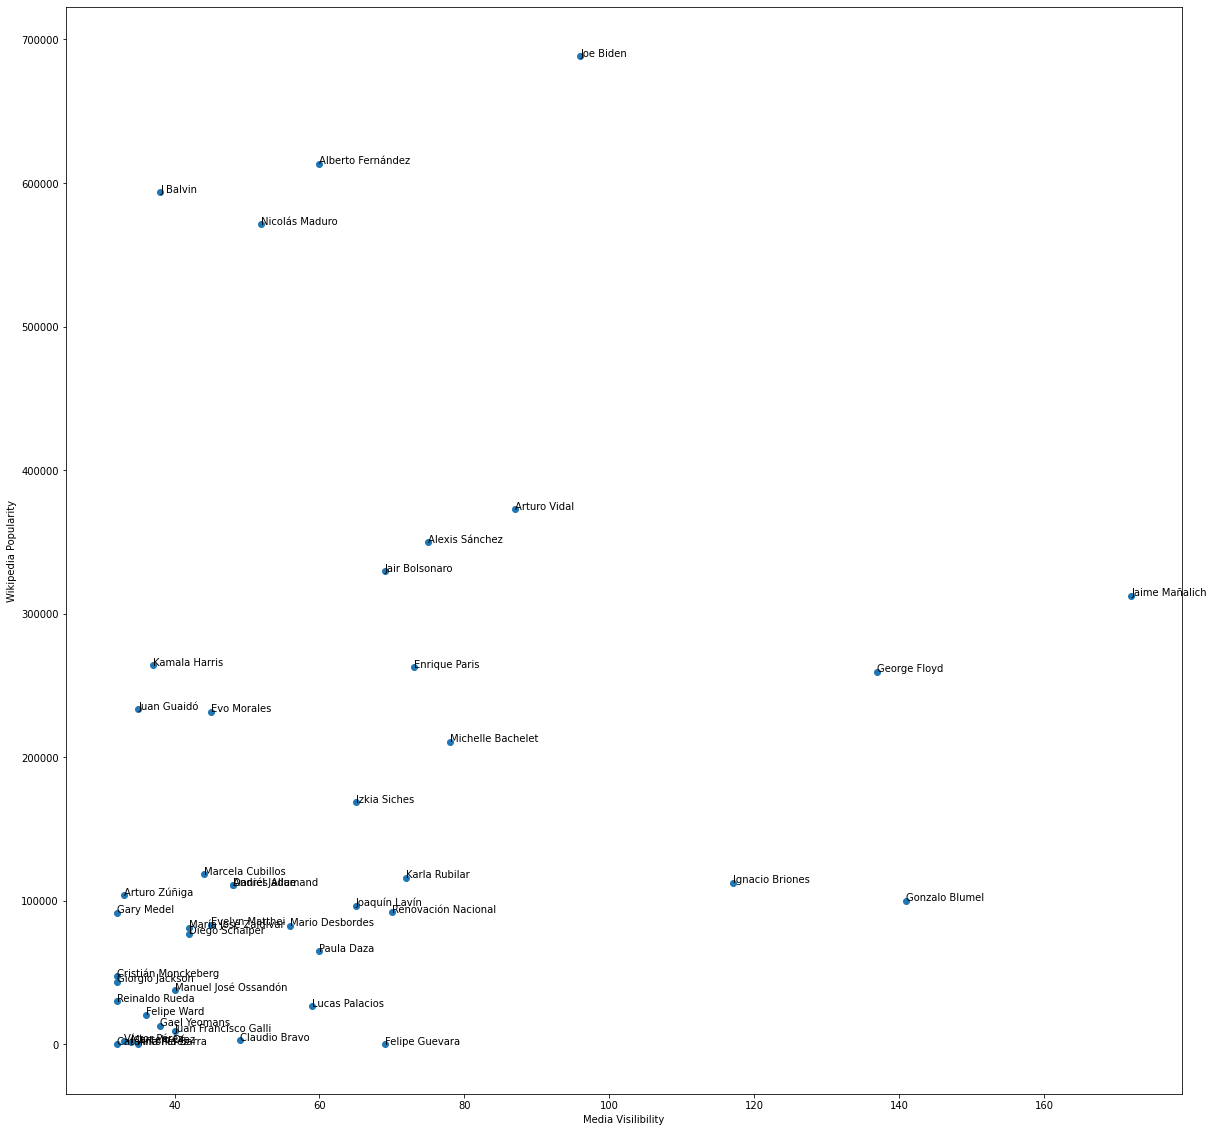

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"]=20,20

fig, ax = plt.subplots()

ax.scatter(x,y)

plt.xlabel("Media Visilibility")
plt.ylabel("Wikipedia Popularity")

for i, txt in enumerate(label):
    ax.annotate(txt,(x[i], y[i]))#,fontsize=60) 
